In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score , classification_report
import os

In [2]:
# read from current working directory (os.chdir was set earlier in the notebook)
hr = pd.read_csv('C:\\Users\\dbda.STUDENTSDC\\Downloads\\HR_comma_sep.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low


In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [4]:
X , y = hr.drop('left',axis=1) , hr['left']
ohe = OneHotEncoder(drop='first', sparse_output=False).set_output(transform="pandas")
col_transformer = ColumnTransformer([("OHE", ohe, make_column_selector(dtype_include=object))], 
                                    remainder='passthrough', 
                                    verbose_feature_names_out=False)
col_transformer = col_transformer.set_output(transform="pandas")
X = col_transformer.fit_transform(X)
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=25,stratify=y)

In [5]:
lr = LogisticRegression(solver='liblinear', penalty='l1')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      3429
           1       0.64      0.37      0.47      1070

    accuracy                           0.80      4499
   macro avg       0.73      0.65      0.67      4499
weighted avg       0.78      0.80      0.78      4499



In [8]:
solvers = ['newton-cg', 'lbfgs', 'newton-cholesky', 'sag', 'saga']
penalties = ['l2',None]

scores = []

for s in solvers:
    for p in penalties:
        try:
            lr = LogisticRegression(solver=s, penalty=p)
            lr.fit(X_train, y_train)
            y_pred = lr.predict(X_test)
            score = accuracy_score(y_test,y_pred)
            scores.append([s,p,score])
        except:
            continue

df_scores = pd.DataFrame(scores,columns=['Solver','Penalty','Score'])
df_scores.sort_values(by='Score',ascending=False)

d:\meridianthe4\PML\main\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\meridianthe4\PML\main\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also re

,Solver,Penalty,Score
3,lbfgs,None,0.808846
2,lbfgs,l2,0.806846
0,newton-cg,l2,0.799289
1,newton-cg,None,0.799066
4,newton-cholesky,l2,0.799066
5,newton-cholesky,None,0.799066
9,saga,None,0.757724
8,saga,l2,0.757724
6,sag,l2,0.750834
7,sag,None,0.750389


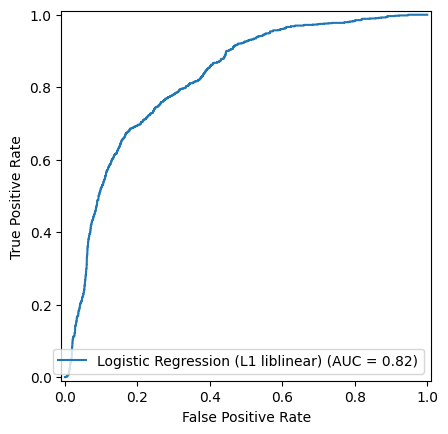

In [10]:
from sklearn.metrics import roc_curve

# fix: ensure roc_curve and matplotlib are available, then plot ROC
import matplotlib.pyplot as plt

probs = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)

disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, name='Logistic Regression (L1 liblinear)')
disp.plot()
plt.show()

In [12]:
solvers = ['newton-cg', 'lbfgs', 'newton-cholesky', 'sag', 'saga']
penalties = ['l2', None]

scores = []

for s in solvers:
    for p in penalties:
        try:
            lr = LogisticRegression(solver=s, penalty=p, max_iter=1000)  # Added max_iter
            lr.fit(X_train, y_train)
            y_pred_proba = lr.predict_proba(X_test)[:, 1]  # Get probabilities for positive class only
            scores.append([s, p, roc_auc_score(y_test, y_pred_proba)])
        except Exception as e:
            print(f"Failed: solver={s}, penalty={p}, error={e}")  # Better error handling
            continue

df_scores = pd.DataFrame(scores, columns=['Solver', 'Penalty', 'Score'])
df_scores = df_scores.sort_values(by='Score', ascending=False)
print(df_scores.head())

d:\meridianthe4\PML\main\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\meridianthe4\PML\main\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\meridianthe4\PML\main\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


            Solver Penalty     Score
4  newton-cholesky      l2  0.822268
2            lbfgs      l2  0.822219
1        newton-cg    None  0.822192
3            lbfgs    None  0.822171
0        newton-cg      l2  0.822166


d:\meridianthe4\PML\main\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [16]:
from sklearn.metrics import log_loss

In [18]:
lr = LogisticRegression(solver='liblinear', penalty='l1')
lr.fit(X_train, y_train)
y_pred_proba = lr.predict_proba(X_test)
logloss = log_loss(y_test, y_pred_proba)
logloss

0.4276235370595313

In [20]:
solvers = ['newton-cg', 'lbfgs', 'newton-cholesky', 'sag', 'saga']
penalties = ['l2', None]

scores = []

for s in solvers:
    for p in penalties:
        try:
            lr = LogisticRegression(solver=s, penalty=p, max_iter=1000)  # Added max_iter
            lr.fit(X_train, y_train)
            y_pred_proba = lr.predict_proba(X_test)[:, 1]  # Get probabilities for positive class only
            scores.append([s, p, log_loss(y_test, y_pred_proba)])
        except Exception as e:
            print(f"Failed: solver={s}, penalty={p}, error={e}")  # Better error handling
            continue

df_scores = pd.DataFrame(scores, columns=['Solver', 'Penalty', 'Score'])
df_scores = df_scores.sort_values(by='Score', ascending=True)
print(df_scores.head())

d:\meridianthe4\PML\main\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\meridianthe4\PML\main\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\meridianthe4\PML\main\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


            Solver Penalty     Score
3            lbfgs    None  0.427709
1        newton-cg    None  0.427732
5  newton-cholesky    None  0.427740
0        newton-cg      l2  0.427772
2            lbfgs      l2  0.427777


d:\meridianthe4\PML\main\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
